## Tuning Best model found so far


Tune Optimizer: 

    1) Adam
    
    2) AdaMax
    
    3) Nadam
    
    4) AMSGrad
        
<img src="../img/optimizer_gradients.png" alt="Optimizers" style="width: 400px;"/>


#### A) Base model for optimizer tuning: Deep Feed Forward NN (Best model from last iteration)

  80% train / 20% test / 0% validation split

**kernel_initializer:** glorot_normal

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**loss:** MSE

In [2]:
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

number_hidden_layer = round(x_train.shape[1]*1.5)

Using TensorFlow backend.


### 1) Adam optimizer

Using model specified above, in **A)** with:

**optimizer:** <font color=red>adam</font>


#### <font color=green>Best optimizer: Adam</font>
<font color=green>MSE of training: 0.0003360253017903729
    
MSE of testing: 0.12210869044065475

1st quartile: 10.598936% | Median: 13.202951% | 3rd quartile: 17.718213% </font>

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                4788      
_________________________________________________________________
dense_2 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

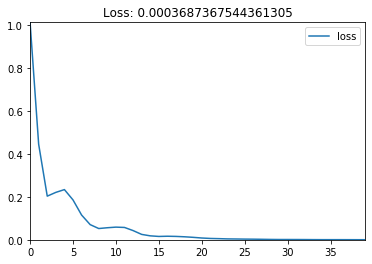

MSE of training: 0.0003360253017903729
MSE of testing: 0.12210869044065475
    Prediction      Real     % error
8     7.424342  8.491036   12.562587
0     6.741398  8.075241   16.517682
7     5.383605  5.156991    4.394305
9     4.127663  4.785659   13.749333
2     5.225519  4.616062   13.202951
1     2.975265  3.669486   18.918743
6     3.819463  3.491649    9.388518
3     2.857240  3.003443    4.867853
10    1.215206  1.377930   11.809354
5     2.413080  0.900556  167.954339
4    -0.615515  0.667981  192.145531


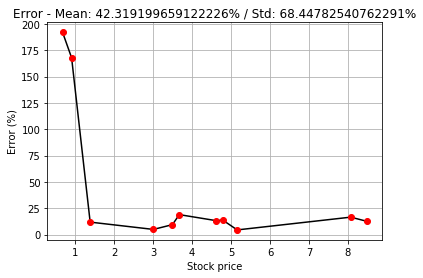

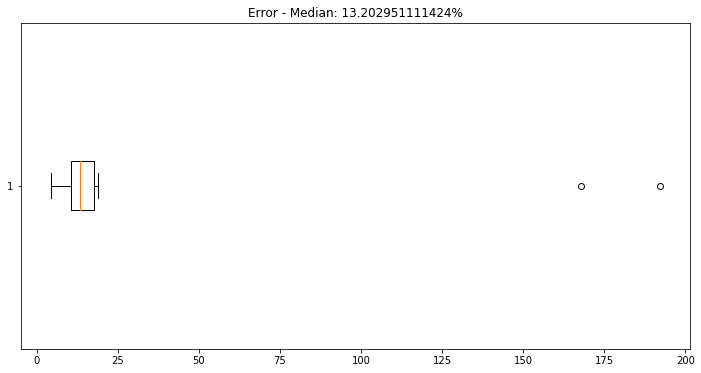

count     11.000000
mean      42.319200
std       68.447825
min        4.394305
25%       10.598936
50%       13.202951
75%       17.718213
max      192.145531
Name: % error, dtype: float64


In [3]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)

### 2) Adamax optimizer

Using model specified above, in **A)** with:

**optimizer:** <font color=red>adamax</font>

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 84)                4788      
_________________________________________________________________
dense_5 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

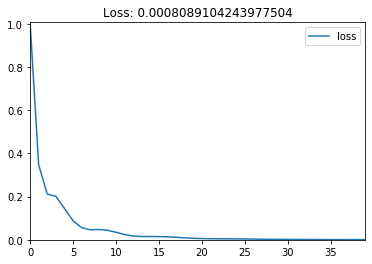

MSE of training: 0.0007308965749953958
MSE of testing: 0.12141933292150497
    Prediction      Real     % error
8     7.292857  8.491036   14.111102
0     6.791434  8.075241   15.898066
7     5.532750  5.156991    7.286410
9     3.986137  4.785659   16.706626
2     5.128781  4.616062   11.107272
1     2.935455  3.669486   20.003635
6     3.783765  3.491649    8.366124
3     2.863507  3.003443    4.659198
10    1.445250  1.377930    4.885564
5     2.326206  0.900556  158.307634
4    -0.552728  0.667981  182.746076


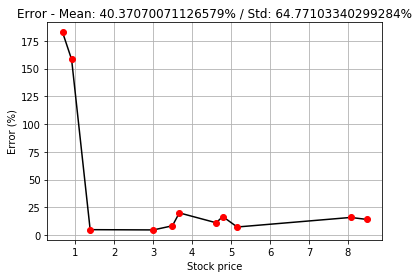

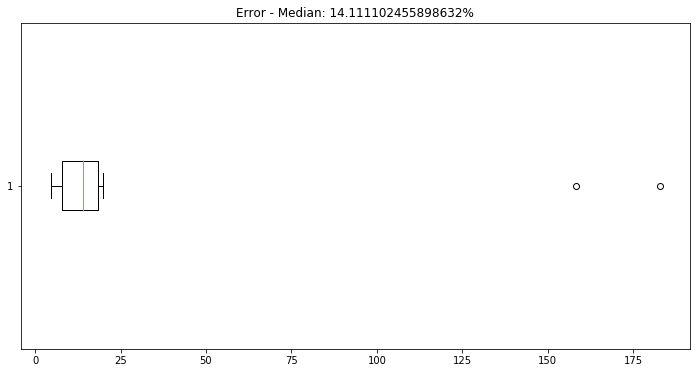

count     11.000000
mean      40.370701
std       64.771033
min        4.659198
25%        7.826267
50%       14.111102
75%       18.355131
max      182.746076
Name: % error, dtype: float64


In [4]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations, optimizer='adamax')
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)

### 3) Nadam optimizer

Using model specified above, in **A)** with:

**optimizer:** <font color=red>nadam</font>

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 84)                4788      
_________________________________________________________________
dense_26 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

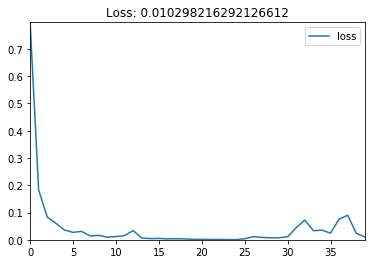

MSE of training: 0.00392071985300969
MSE of testing: 0.13499721884727478
    Prediction      Real     % error
8     7.898605  8.491036    6.977130
0     6.789361  8.075241   15.923729
7     5.995601  5.156991   16.261617
9     4.062751  4.785659   15.105715
2     5.241352  4.616062   13.545957
1     2.937714  3.669486   19.942086
6     3.675740  3.491649    5.272318
3     3.064144  3.003443    2.021030
10    1.204869  1.377930   12.559511
5     2.594580  0.900556  188.108569
4    -0.792105  0.667981  218.581904


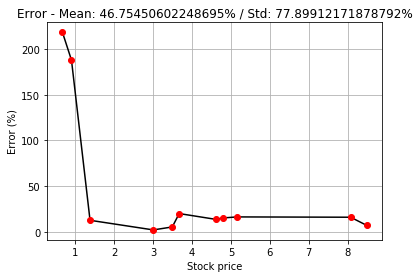

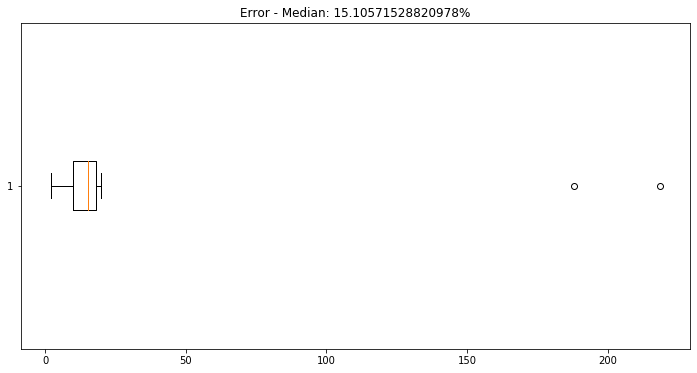

count     11.000000
mean      46.754506
std       77.899122
min        2.021030
25%        9.768320
50%       15.105715
75%       18.101851
max      218.581904
Name: % error, dtype: float64


In [11]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations, optimizer='nadam')
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)

Como é possivel observar na figura a seguit, se o modelo com o otimizador Nadam é treinado por épocas de mais, o valor da perda começa a aumentar novamente.

<img src="../img/nadam-high-epochs.png" alt="Drawing" style="width: 300px;"/>

Por esse motivo, foi escolhido um número menor de épocas para treinar o modelo e foi testado novamente o resultado.
Epochs de 40 para <font color=red>20</font>

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 84)                4788      
_________________________________________________________________
dense_44 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

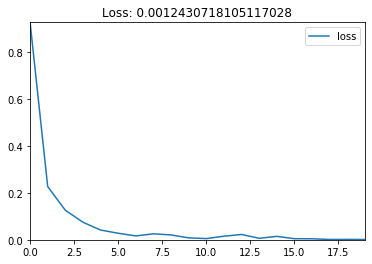

MSE of training: 0.0034448558422313495
MSE of testing: 0.15366798639297485
    Prediction      Real     % error
8     7.144683  8.491036   15.856170
0     6.671814  8.075241   17.379382
7     5.127785  5.156991    0.566336
9     4.156248  4.785659   13.152028
2     5.144657  4.616062   11.451208
1     2.847367  3.669486   22.404210
6     3.487924  3.491649    0.106678
3     2.689300  3.003443   10.459440
10    1.470751  1.377930    6.736204
5     2.650878  0.900556  194.360013
4    -0.814030  0.667981  221.864179


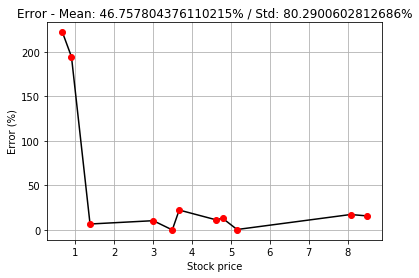

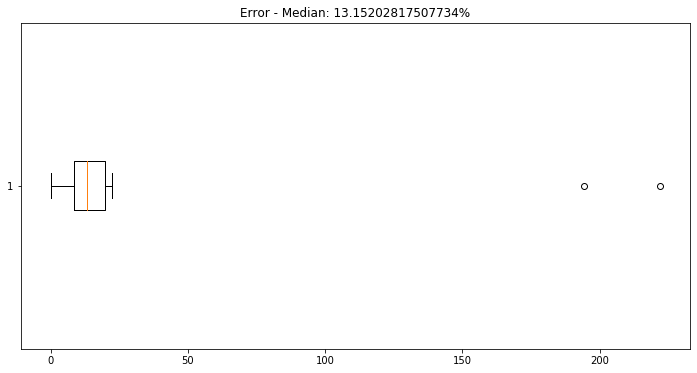

count     11.000000
mean      46.757804
std       80.290060
min        0.106678
25%        8.597822
50%       13.152028
75%       19.891796
max      221.864179
Name: % error, dtype: float64


In [17]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations, optimizer='nadam')
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=20, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)

### 4) AMSGrad optimizer

Using model specified above, in **A)** with:

**optimizer:** <font color=red>amsgrad</font>

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 84)                4788      
_________________________________________________________________
dense_17 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

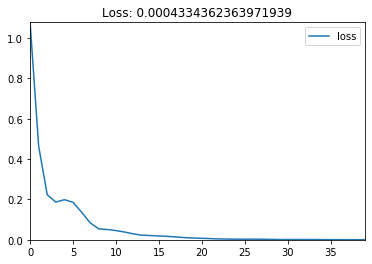

MSE of training: 0.00041896328382956034
MSE of testing: 0.1301732212305069
    Prediction      Real     % error
8     7.365683  8.491036   13.253423
0     6.817659  8.075241   15.573301
7     5.535471  5.156991    7.339180
9     4.253366  4.785659   11.122655
2     5.235816  4.616062   13.426037
1     2.890435  3.669486   21.230506
6     3.844126  3.491649   10.094867
3     2.866959  3.003443    4.544269
10    1.290324  1.377930    6.357824
5     2.491407  0.900556  176.652035
4    -0.728204  0.667981  209.015694


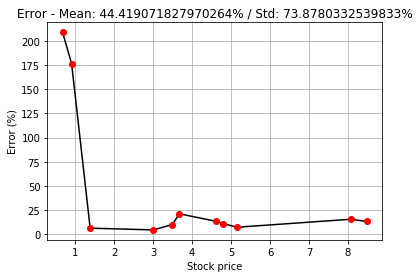

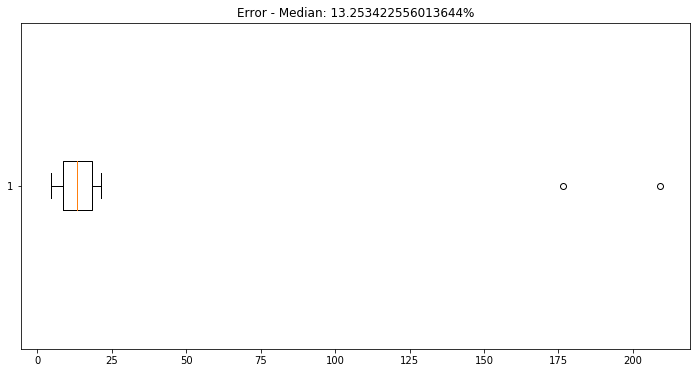

count     11.000000
mean      44.419072
std       73.878033
min        4.544269
25%        8.717023
50%       13.253423
75%       18.401903
max      209.015694
Name: % error, dtype: float64


In [8]:
from keras.optimizers import Adam

optimizer = Adam(amsgrad=True)

# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations, optimizer=optimizer)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)